In [1]:
import pandas as pd
import numpy as np
import os, dataset

In [7]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [8]:
%matplotlib inline

In [15]:
datadir = 'data/hsal/20141124 Heat shift 1/'
datafiles = os.listdir(datadir)

dataf = filter(lambda x: '.csv' in x, datafiles)
metaf = filter(lambda x: '.xlsx' in x, datafiles)

assert len(dataf) == 1
assert len(metaf) == 1

dataf = dataf[0]
metaf = metaf[0]

data = pd.read_csv(os.path.join(datadir, dataf))
meta = pd.read_excel(os.path.join(datadir, metaf))

data = data.iloc[:,[0]+range(2,data.shape[1])]
data.Time = np.arange(0,data.shape[0]*.5,.5)

assert data.shape[1]-1 == meta.shape[0]

In [16]:
def convert(datadir):
    datafiles = os.listdir(datadir)

    dataf = filter(lambda x: '.csv' in x, datafiles)
    metaf = filter(lambda x: '.xlsx' in x, datafiles)

    assert len(dataf) == 1
    assert len(metaf) == 1

    dataf = dataf[0]
    metaf = metaf[0]

    data = pd.read_csv(os.path.join(datadir, dataf))
    meta = pd.read_excel(os.path.join(datadir, metaf))

    data = data.iloc[:,[0]+range(2,data.shape[1])]
    data.Time = np.arange(0,data.shape[0]*.5,.5)

    assert data.shape[1]-1 == meta.shape[0]
    
    data.to_csv(os.path.join(datadir,'data.csv'),index=False)
    meta.to_csv(os.path.join(datadir,'meta.csv'),index=False)

In [10]:
datadirs = os.listdir("data/hsal/")
datadirs.sort()
datadirs

['20141124 Heat shift 1',
 '20141126 Heat shift 2',
 '20141202 Heat shift 3',
 '20141219 Heat shift 4',
 '20150120 Heat shift 6',
 '20150121 Heat shift 7',
 '20150305 Heat shift 8',
 '20150317 Heat shift 9',
 '20150320 Heat shift 10',
 '20150410 Heat shift 11']

In [19]:
for dd in datadirs:
    convert(os.path.join("data/hsal/",dd))

In [31]:
ds = dataset.DataSet(os.path.join("data/hsal/",datadirs[-1]))
ds.meta.head()

,Well,Strain,Media,Condition,Bio,Tech,Heat Shift C,Heat Shift Time
0,101,blank,CM,54C shift at 16h,NaN,NaN,54,16
1,102,idr1,CM,54C shift at 16h,A,1.0,54,16
2,103,idr1,CM,54C shift at 16h,A,2.0,54,16
3,104,idr1,CM,54C shift at 16h,A,3.0,54,16
4,105,idr1,CM,54C shift at 16h,B,1.0,54,16


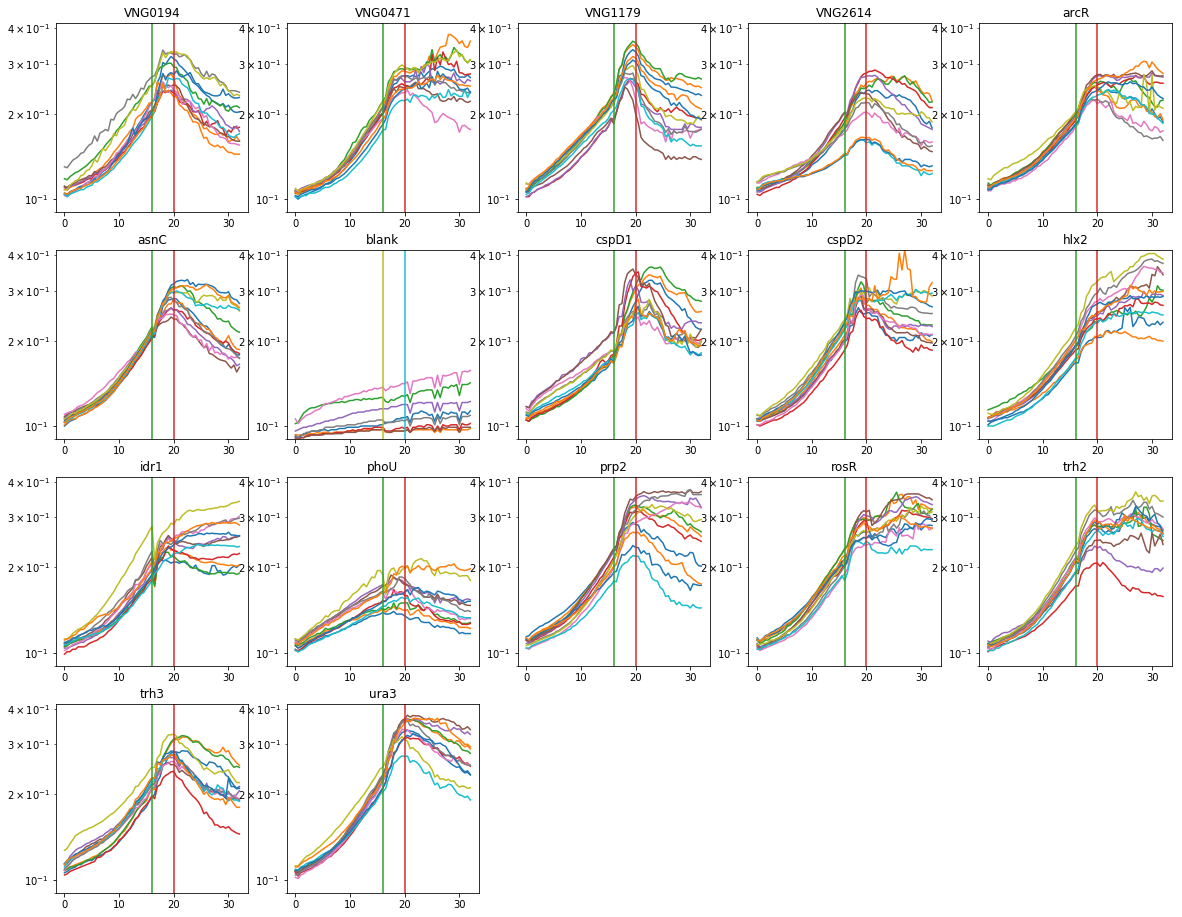

In [32]:
strains = ds.meta.Strain.unique()
strains.sort()

plt.figure(figsize=(5*4,(strains.shape[0]/5+1)*4))
for i,s in enumerate(strains):
#     if s == 'blank':
#         continue
        
    x,y,_,_ = ds.build(Strain=s)
    
    plt.subplot((strains.shape[0])/5+1,5,i+1)
    plt.title(s)
    plt.plot(x,y)
    plt.plot([16,16],[ds.data.min().min(), ds.data.max().max()])
    plt.plot([20,20],[ds.data.min().min(), ds.data.max().max()])
    plt.semilogy()
    plt.ylim(ds.data.min().min(), ds.data.max().max())